This project is a sample for modeling the ability to predict if a loan will be approved based on a decision tree classified from Scikit Learn.  

This data comes from the Kaggle dataset "Eligibility Prediction for Loan" authored by Devzohaib which can be found here: https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

Load Data

In [ ]:
data = pd.read_csv(r"loan-prediction.csv")

Review Data

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan Approved
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000
std,5668.251251,2617.692267,80.508164,65.212401
min,150.000000,0.000000,9.000000,36.000000
25%,2898.750000,0.000000,100.000000,360.000000
50%,3859.000000,1084.500000,128.000000,360.000000
75%,5852.500000,2253.250000,170.000000,360.000000
max,81000.000000,33837.000000,600.000000,480.000000


array([[<AxesSubplot: title={'center': 'ApplicantIncome'}>,
        <AxesSubplot: title={'center': 'CoapplicantIncome'}>],
       [<AxesSubplot: title={'center': 'LoanAmount'}>,
        <AxesSubplot: title={'center': 'Loan_Amount_Term'}>]],
      dtype=object)

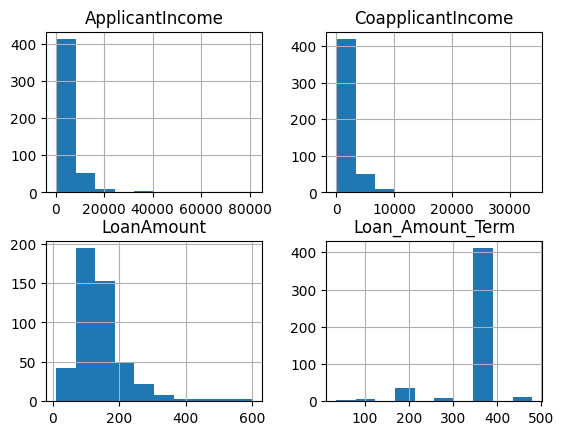

In [5]:
data.hist()

Modify Categorical Data for Modeling

In [10]:
categorized_data = pd.get_dummies(data.iloc[:, 1:], drop_first=True)

In [11]:
categorized_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan Approved_Y
0,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,0,0,0
1,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,0,1,1
2,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,0,1,1
3,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,0,1,1
4,5417,4196.0,267.0,360.0,1,1,0,1,0,0,1,0,1,1


Model Data with Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()
model.fit(categorized_data.iloc[:, :-1], categorized_data.iloc[:, -1])
model.score(categorized_data.iloc[:, :-1], categorized_data.iloc[:, -1])

1.0

Review Top Predictors for Loan Approval

In [13]:
pd.Series(model.feature_importances_, index=categorized_data.iloc[:, :-1].columns).sort_values(ascending=False)

ApplicantIncome            0.254893
LoanAmount                 0.248370
CoapplicantIncome          0.158345
Loan_Amount_Term           0.053719
Married_Yes                0.050412
Self_Employed_Yes          0.047785
Education_Not Graduate     0.034947
Dependents_3+              0.034054
Gender_Male                0.032029
Property_Area_Semiurban    0.024238
Dependents_1               0.022654
Dependents_2               0.019598
Property_Area_Urban        0.018957
dtype: float64

<AxesSubplot: title={'center': 'Histogram of Applicant Income for Loan Approved and Not Approved'}>

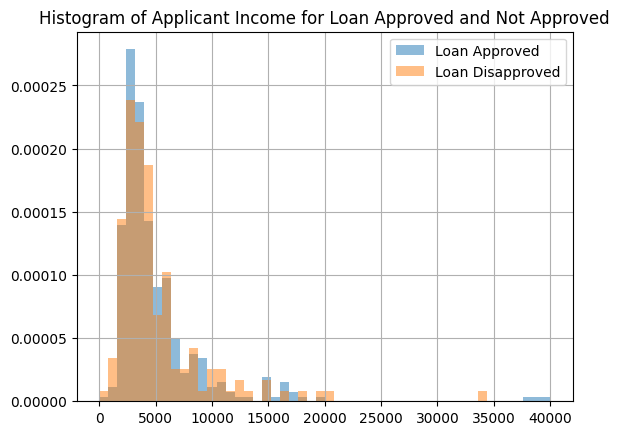

In [36]:
plt.title('Histogram of Applicant Income for Loan Approved and Not Approved')
categorized_data.loc[categorized_data['Loan Approved_Y'] == 1, 'ApplicantIncome'].rename('Loan Approved').hist(alpha = 0.5, legend = True, bins = 50, density = True, range = (0, 40000))
categorized_data.loc[categorized_data['Loan Approved_Y'] == 0, 'ApplicantIncome'].rename('Loan Disapproved').hist(alpha = 0.5, legend = True, bins = 50, density = True, range = (0, 40000))